## Import Libraries and Read the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
data = pd.read_csv("data/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
num_attributes = ["age", "sysBP", "diaBP", "glucose", "totChol","cigsPerDay", "BMI", "heartRate"]
cat_attributes = ['prevalentHyp', 'diabetes', 'male', 'BPMeds', 'prevalentStroke', 'currentSmoker', 'education']
target_variable = 'TenYearCHD'

In [4]:
data[num_attributes].describe()

,age,sysBP,diaBP,glucose,totChol,cigsPerDay,BMI,heartRate
count,4238.000000,4238.000000,4238.000000,3850.000000,4188.000000,4209.000000,4219.000000,4237.000000
mean,49.584946,132.352407,82.893464,81.966753,236.721585,9.003089,25.802008,75.878924
std,8.572160,22.038097,11.910850,23.959998,44.590334,11.920094,4.080111,12.026596
min,32.000000,83.500000,48.000000,40.000000,107.000000,0.000000,15.540000,44.000000
25%,42.000000,117.000000,75.000000,71.000000,206.000000,0.000000,23.070000,68.000000
50%,49.000000,128.000000,82.000000,78.000000,234.000000,0.000000,25.400000,75.000000
75%,56.000000,144.000000,89.875000,87.000000,263.000000,20.000000,28.040000,83.000000
max,70.000000,295.000000,142.500000,394.000000,696.000000,70.000000,56.800000,143.000000


## Percent of Null Values

In [5]:
null_proportions = (data.isnull().sum() / data.shape[0]) * 100
null_proportions.sort_values(ascending=False)

glucose            9.155262
education          2.477584
BPMeds             1.250590
totChol            1.179802
cigsPerDay         0.684285
BMI                0.448325
heartRate          0.023596
male               0.000000
age                0.000000
currentSmoker      0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

In [6]:
# Dropping NA values
data_without_na = data.dropna()

## Discover and Visualize the Data to Gain Insights

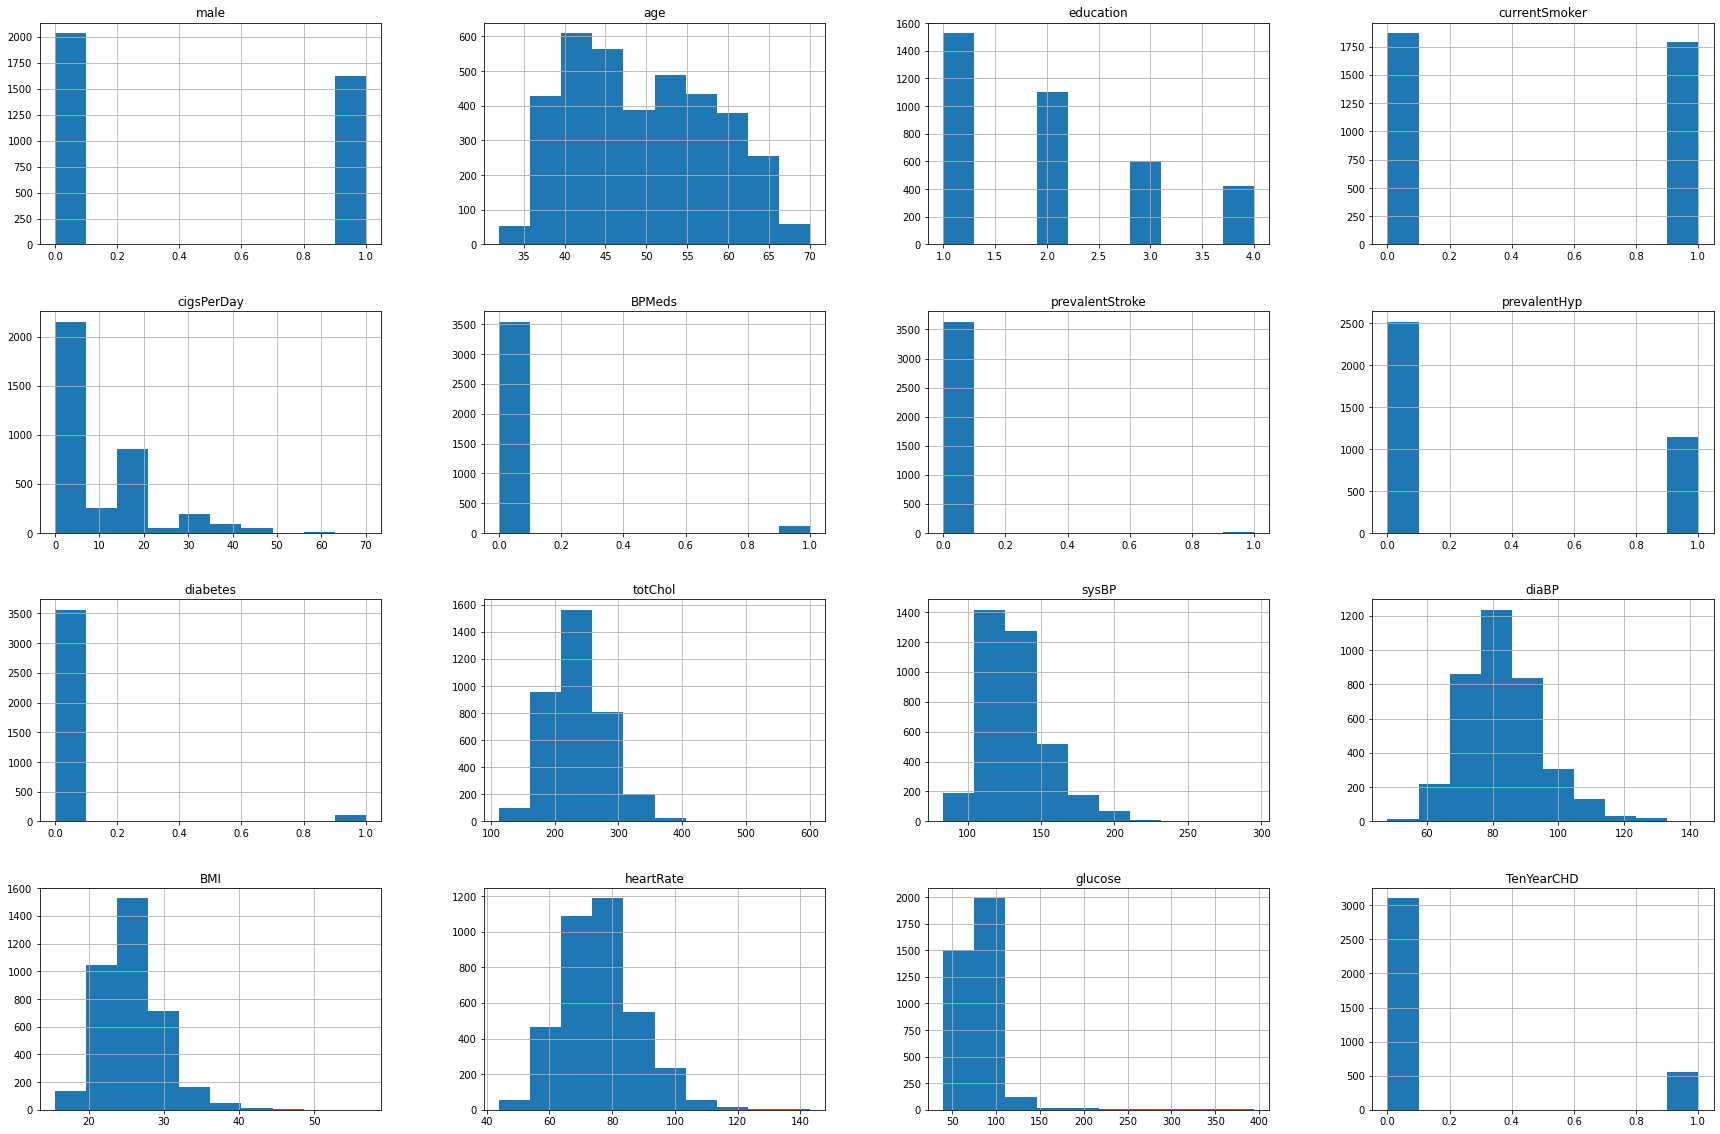

In [7]:
data_without_na.hist(figsize=(30, 20))
plt.show()

In [8]:
data_without_na.corr()['TenYearCHD'].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
male               0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
education         -0.063068
Name: TenYearCHD, dtype: float64

In [9]:
encoded_data = pd.get_dummies(data_without_na[cat_attributes].astype(str), prefix = cat_attributes)
data_without_na.corr()['TenYearCHD'].sort_values(ascending=False)
data_with_dummies = data_without_na.join(encoded_data)
data_with_dummies.corr()['TenYearCHD'].sort_values(ascending=False)

TenYearCHD           1.000000
age                  0.233810
sysBP                0.222885
prevalentHyp         0.181556
prevalentHyp_1       0.181556
diaBP                0.150342
glucose              0.121942
diabetes_1           0.093397
diabetes             0.093397
male                 0.091745
male_1               0.091745
totChol              0.091127
education_1.0        0.090310
BPMeds_1.0           0.089116
BPMeds               0.089116
BMI                  0.081931
cigsPerDay           0.052159
prevalentStroke      0.048351
prevalentStroke_1    0.048351
heartRate            0.020523
currentSmoker        0.019176
currentSmoker_1      0.019176
education_4.0       -0.010577
currentSmoker_0     -0.019176
education_3.0       -0.035462
prevalentStroke_0   -0.048351
education_2.0       -0.060956
education           -0.063068
BPMeds_0.0          -0.089116
male_0              -0.091745
diabetes_0          -0.093397
prevalentHyp_0      -0.181556
Name: TenYearCHD, dtype: float64

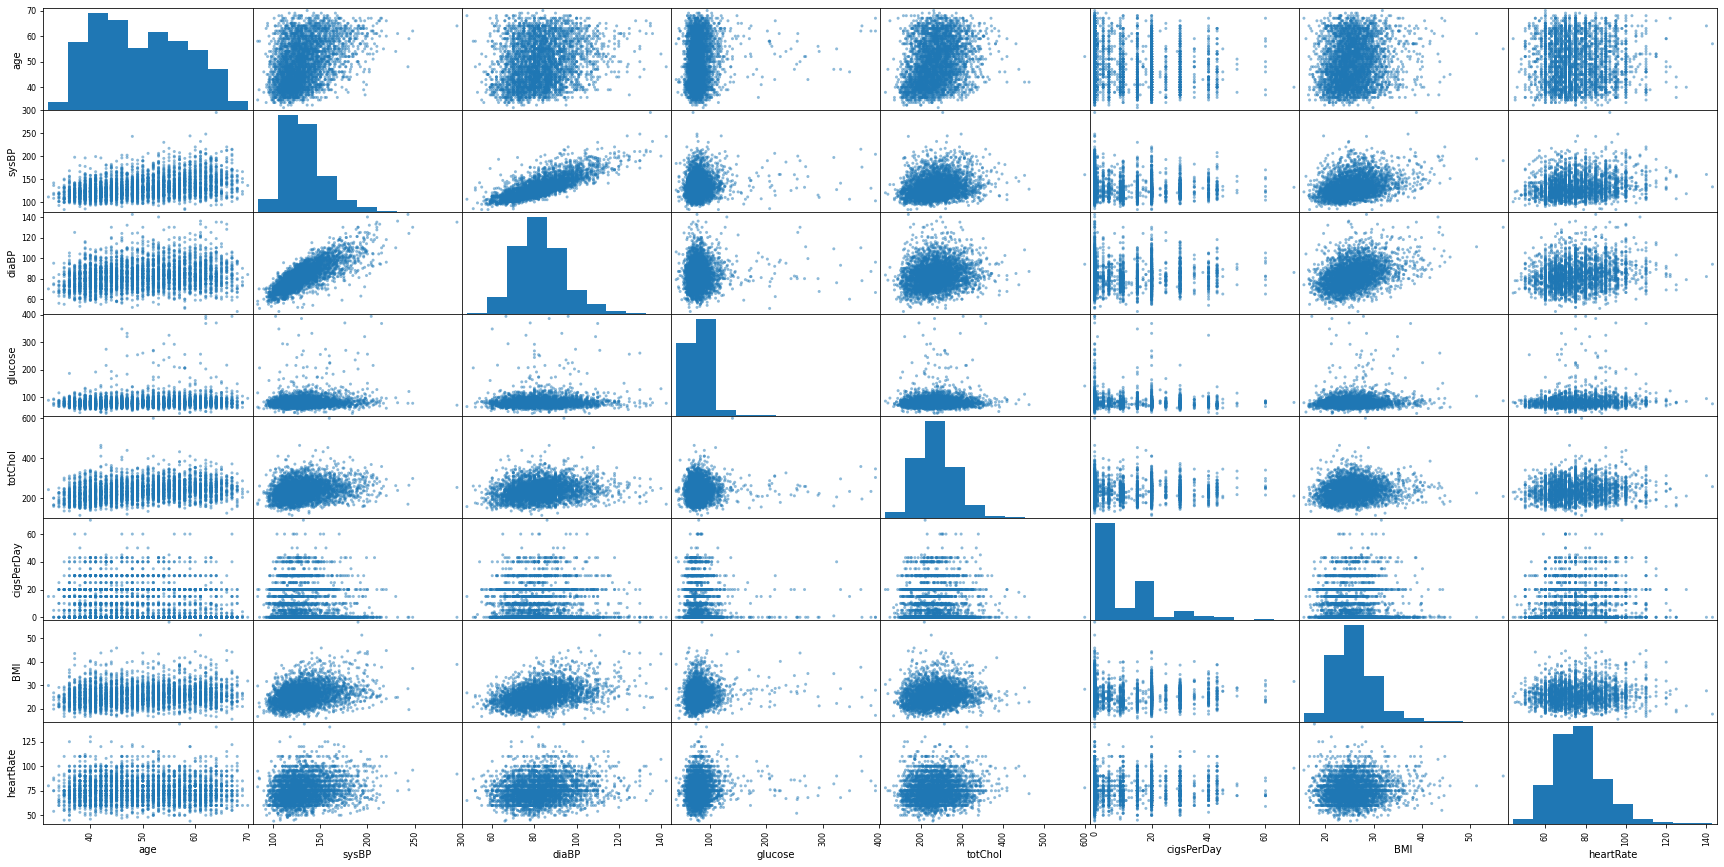

In [10]:
scatter_matrix(data_without_na[num_attributes], figsize=(30, 15))
plt.show()

<AxesSubplot:xlabel='sysBP', ylabel='diaBP'>

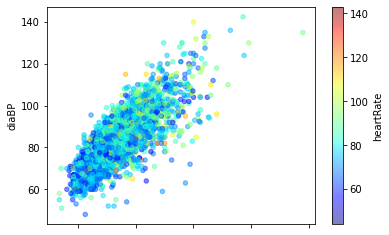

In [11]:
data_without_na.plot.scatter('sysBP', 'diaBP', alpha=0.5, c='heartRate', cmap=plt.get_cmap("jet"))

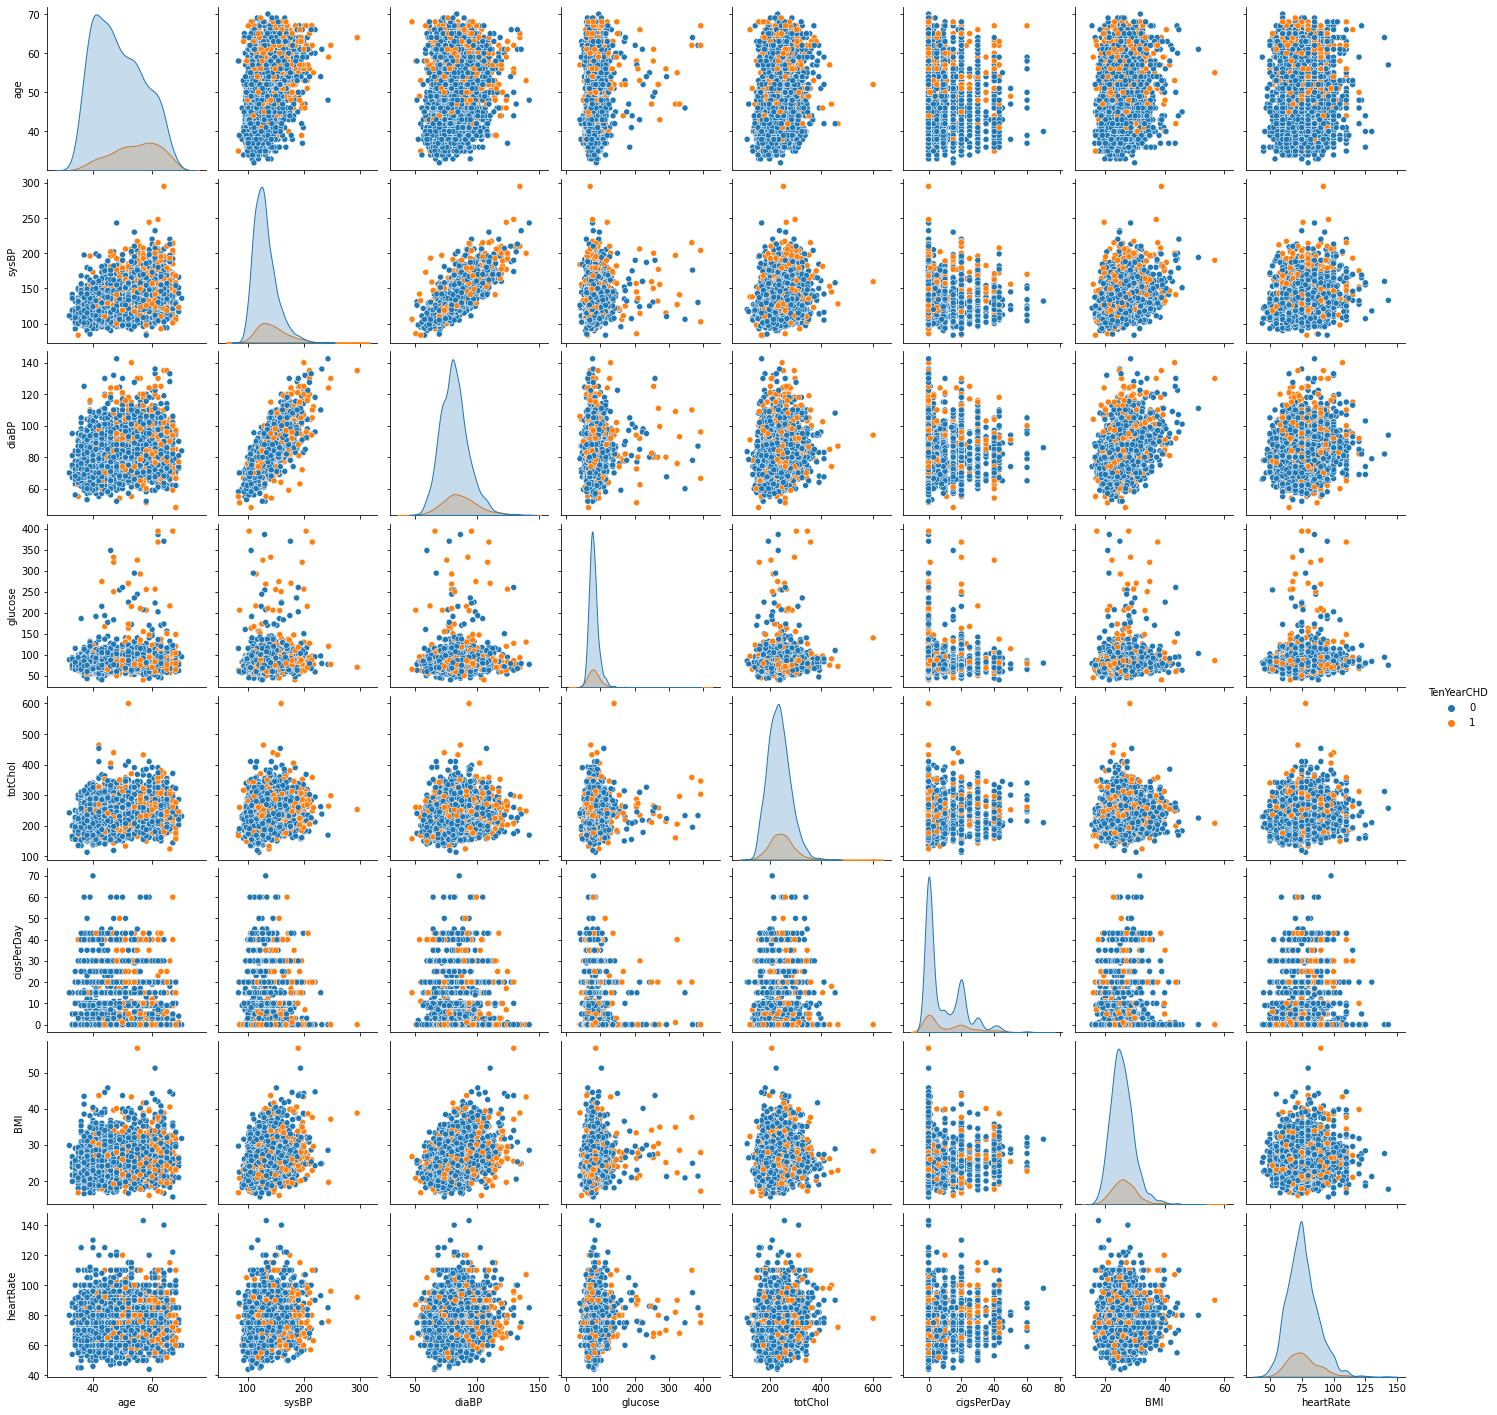

In [12]:
# As we can see pairplot can be more useful than scatter matrix when target variable is categorical.
g = sns.pairplot(data_without_na[num_attributes + [target_variable]],hue = target_variable)

<AxesSubplot:xlabel='cigsPerDay', ylabel='Count'>

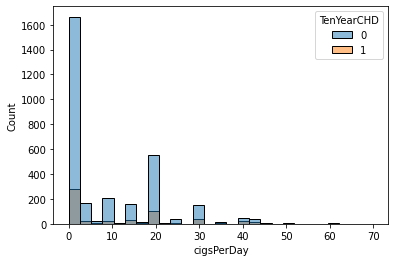

In [13]:
sns.histplot(data_without_na, x='cigsPerDay', hue=target_variable)

In [14]:
# 'diabetes', 'BPMeds', 'prevalentStroke' can be dropped as they are highly unbalancerd
train_data = data_without_na.drop(['diabetes', 'BPMeds', 'prevalentStroke'], axis = 1)

In [15]:
# Crosstab is used when we are comparing two or more categorical variables
pd.crosstab(train_data.prevalentHyp,train_data.TenYearCHD)

TenYearCHD,0,1
prevalentHyp,,
0,2244,273
1,855,284


<AxesSubplot:xlabel='prevalentHyp'>

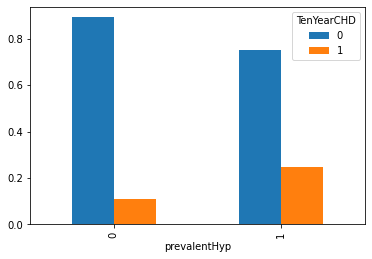

In [16]:
pd.crosstab(train_data.prevalentHyp,train_data.TenYearCHD, normalize='index').plot(kind='bar')

## Splitting Test data

We are using StratifiedShuffleSplit by making age column categorical and using it's bins cause age is most correlated feature to our target variable

In [17]:
train_data["age_cat"] = pd.cut(train_data["age"],
                               bins=[ 30, 40, 50, 60, np.inf],
                               labels=['30s', '40s', '50s', '60 and above'])

<AxesSubplot:>

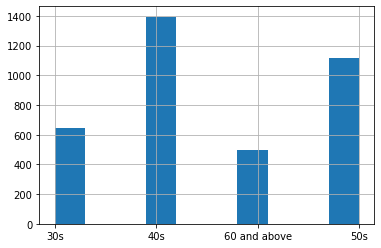

In [18]:
train_data["age_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_data, train_data["age_cat"]):
    strat_train_set = train_data.iloc[train_index]
    strat_test_set = train_data.iloc[test_index]

In [20]:
def income_cat_proportions(data):
    return data["age_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(train_data),
    "Stratified Test Data": income_cat_proportions(strat_test_set),
}).sort_index()
compare_props["Strat. %error"] = 100 * compare_props["Stratified Test Data"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified Test Data,Strat. %error
30s,0.176696,0.176230,-0.263919
40s,0.381291,0.381148,-0.037632
50s,0.305799,0.306011,0.069406
60 and above,0.136214,0.136612,0.291878


In [21]:
# Dropping age_cat but it can also be used during training instead of continous age column.
strat_train_set = strat_train_set.drop('age_cat', axis=1)
strat_test_set = strat_test_set.drop('age_cat', axis=1)

# Save the Train Data and Test Data in Disk 


In [22]:
strat_train_set.to_csv('data/train_data.csv', index=False)
strat_test_set.to_csv('data/test_data.csv', index=False)